In [160]:
from selenium import webdriver
import requests
browser = webdriver.Safari()
browser.get("https://www.itftennis.com/juniors/rankings/year-end-rankings.aspx?yr=2008")

In [161]:
import time

In [163]:
browser.find_element_by_id("tabBoys")

<selenium.webdriver.remote.webelement.WebElement (session="8DC1B38E-0062-4279-8CD0-02C60A26207E", element="node-594261C6-6F1D-4883-8E36-42A4E08AF411")>

In [164]:
from bs4 import BeautifulSoup

In [165]:
soup = BeautifulSoup(browser.page_source, 'html.parser')

In [166]:
results = soup.find_all("span",{"class":"flagLeft"})

In [168]:
len(results)

182

In [170]:
first_result = results[0]
first_result

<span class="flagLeft">
<img alt="Chinese Taipei" class="flag14 f14TPE" src="/ITF/Images/pixel.gif" title="Chinese Taipei"/>
<a class="drsh100068402" href="/juniors/players/player/profile.aspx?playerid=100068402">Tsung-Hua YANG</a></span>

In [175]:
first_result.find("a").text

'Tsung-Hua YANG'

In [220]:
first_result.contents

['\n',
 <img alt="Chinese Taipei" class="flag14 f14TPE" src="/ITF/Images/pixel.gif" title="Chinese Taipei"/>,
 '\n',
 <a class="drsh100068402" href="/juniors/players/player/profile.aspx?playerid=100068402">Tsung-Hua YANG</a>]

In [234]:
first_result.contents[1]

<img alt="Chinese Taipei" class="flag14 f14TPE" src="/ITF/Images/pixel.gif" title="Chinese Taipei"/>

In [240]:
len(first_result.find("img")[

0

In [243]:
first_result.find("img")["alt"]

'Chinese Taipei'

In [244]:
records = []
for result in results:
    name = result.find("a").text
    nation = result.find("img")["alt"]
    records.append((name, nation))

In [245]:
len(records)

182

In [246]:
records[0:3]

[('Tsung-Hua YANG', 'Chinese Taipei'),
 ('Yuki BHAMBRI', 'India'),
 ('Bernard TOMIC', 'Australia')]

In [317]:
import pandas as pd
df = pd.DataFrame(records, columns=["name", "nation"])

In [318]:
df.head()

,name,nation
0,Tsung-Hua YANG,Chinese Taipei
1,Yuki BHAMBRI,India
2,Bernard TOMIC,Australia
3,Henri KONTINEN,Finland
4,Cedrik-Marcel STEBE,Germany


In [319]:
df.to_csv("ITF 2008 Boy", index=False, encoding="utf-8")

In [320]:
df.head()

,name,nation
0,Tsung-Hua YANG,Chinese Taipei
1,Yuki BHAMBRI,India
2,Bernard TOMIC,Australia
3,Henri KONTINEN,Finland
4,Cedrik-Marcel STEBE,Germany


In [321]:
from matplotlib import pyplot as plt

In [325]:
groupby_nation = df.groupby("nation").count().reset_index()

In [326]:
groupby_nation.head()

,nation,name
0,Argentina,4
1,Australia,10
2,Austria,3
3,Belarus,2
4,Belgium,4


In [355]:
groupby_nation["amount"] = groupby_nation["name"]
groupby_nation.head()

,nation,name,index,amount
0,Argentina,4,0,4
1,Australia,10,0,10
2,Austria,3,0,3
3,Belarus,2,0,2
4,Belgium,4,0,4


In [356]:
import seaborn as sns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

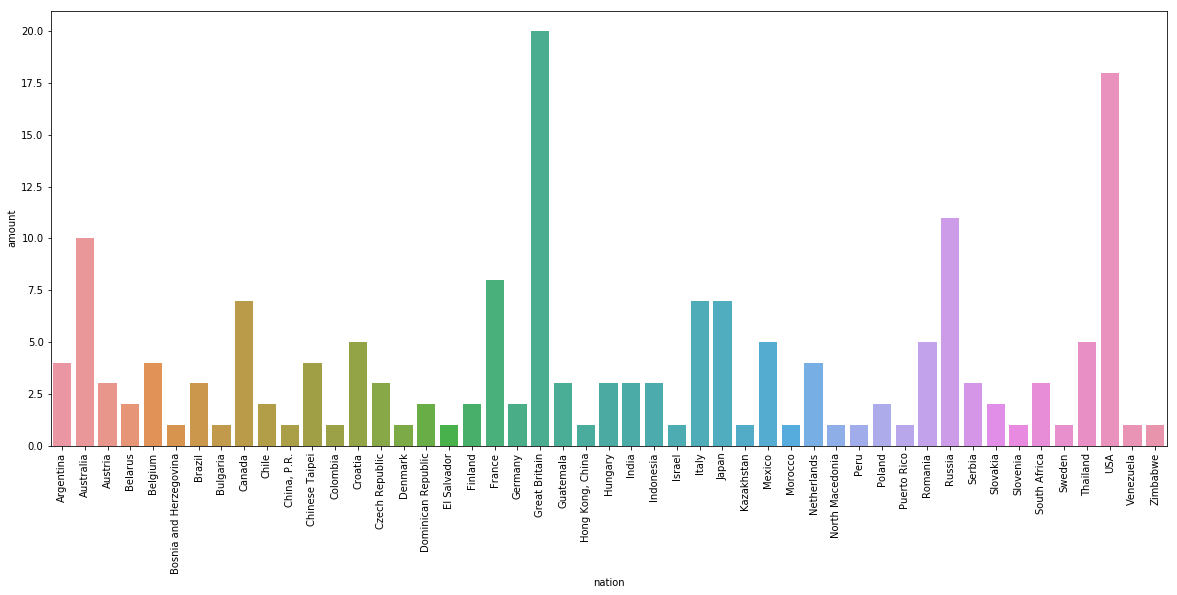

In [421]:
fix, ax = plt.subplots(figsize=(20, 8))
sns.set_context(font_scale=0.9) 
sns.barplot(data=groupby_nation, x="nation", y="amount")
plt.xticks(rotation=90)

In [424]:
plt.gcf()
plt.savefig("ITF 2008 Boy.png")

<Figure size 432x288 with 0 Axes>

In [425]:
plt.show()